In [16]:
import pandas as pd
from joblib import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
test_data = pd.read_csv('demo.csv')
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
           "Shirt", "Sneaker", "Bag", "Ankle boot"]

test_data.head()

,label,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,2,0.000000,0.248,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007843,0.007843,0.007843,0.011765,0.007874,0.019841,0.0,0.015686,0.576471,0.584314
1,3,0.000000,0.536,0.552941,0.650980,0.568627,0.427451,0.466667,0.478431,0.600000,...,0.556863,0.400000,0.572549,0.341176,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,7,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1,0.000000,0.000,0.054902,0.000000,0.090196,0.254902,0.000000,0.000000,0.000000,...,0.000000,0.141176,0.592157,0.549020,0.429134,0.293651,0.0,0.000000,0.000000,0.000000
4,2,0.114754,0.144,0.403922,0.568627,0.113725,0.000000,0.000000,0.078431,0.513725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007937,0.0,0.368627,0.549020,0.407843


In [3]:
def display_confusion_matrix(y_pred, model_name):
  
  cm = confusion_matrix(y_test, y_pred)

  df_cm = pd.DataFrame(cm, index = classes,
                          columns = classes)

  plt.subplots(figsize=(8, 5))
  ax = sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"fontsize":11},
                  cmap=sn.color_palette("GnBu_d"))
  ax.set_ylim(10.0, 0.0)
  ax.set_yticklabels(labels=classes, fontsize=13)
  ax.set_xticklabels(labels=classes, fontsize=13, rotation=25)
  ax.set_title(model_name)

  plt.show()

#Function to calculate test accuracy, precision and recall
def scores(y_pred, model_name):
  accuracy = accuracy_score(y_test, y_pred)
  #Since there is no class imbalance we can use macro instead of micro
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')

  return [model_name, accuracy * 100, precision * 100, recall * 100]

In [4]:
x_test_scaled = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values

In [5]:
#Base learners
rf = load('Models/random_forest_1.joblib')
svm = load('Models/bagging_svm_rbf_2.joblib')
knn = load('Models/knn_1.joblib')

#Meta estimator
dt = load('Models/decision_tree_1.joblib')

In [6]:
rf_pred = rf.predict(x_test_scaled)
svm_pred = svm.predict(x_test_scaled)
knn_pred = knn.predict(x_test_scaled)

predictions_df = pd.DataFrame(np.column_stack([rf_pred,
                                               svm_pred,
                                               knn_pred]), columns=["RF", "SVM", "KNN"])
predictions_df.head()

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    1.8s finished


,RF,SVM,KNN
0,2,2,2
1,3,3,3
2,7,7,7
3,1,1,1
4,2,2,2


In [10]:
ensemble_pred = dt.predict(predictions_df)

In [17]:
comp_pred = pd.DataFrame(np.column_stack([rf_pred,
                          svm_pred,
                          knn_pred,
                          ensemble_pred]), columns=['RF','SVM', 'KNN','DT (meta), RF, SVM, KNN (base)'])

Results for RF : 


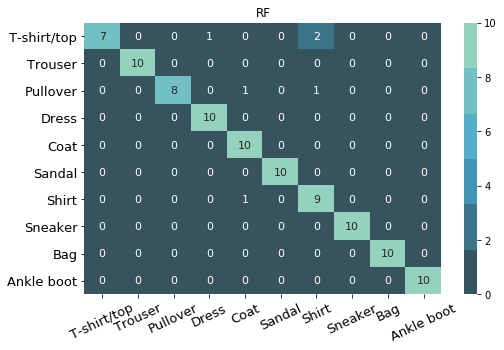


Results for SVM : 


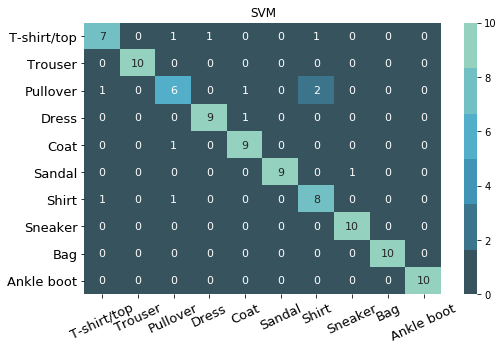


Results for KNN : 


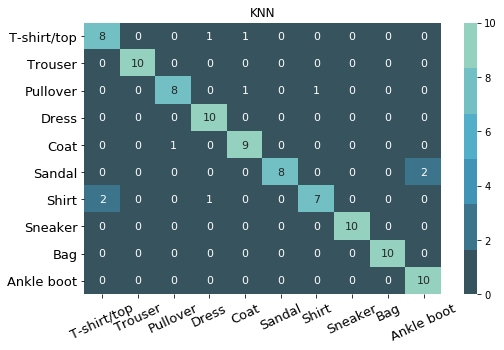


Results for DT (meta), RF, SVM, KNN (base) : 


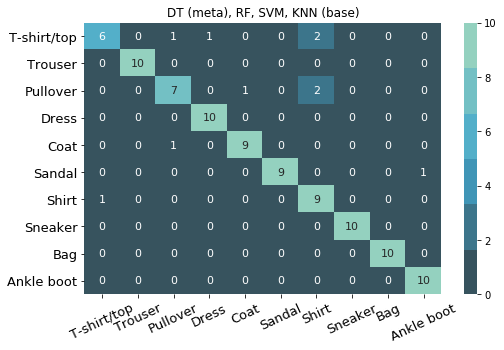

,Model,Accuracy,Precision,Recall
0,RF,94.0,94.924242,94.0
1,SVM,88.0,87.989899,88.0
2,KNN,90.0,90.487374,90.0
3,"DT (meta), RF, SVM, KNN (base)",90.0,90.454101,90.0


In [20]:
scores_df = pd.DataFrame(columns=["Model","Accuracy", "Precision", "Recall"])

for model in comp_pred.columns.values:
  print("Results for %s : " % (model))
  display_confusion_matrix(comp_pred[model], model)
  scores_df.loc[len(scores_df)] = scores(comp_pred[model], model)
  print()
    
scores_df